In [1]:
from enum import Enum
from IPython.display import Image
import math
import numpy as np

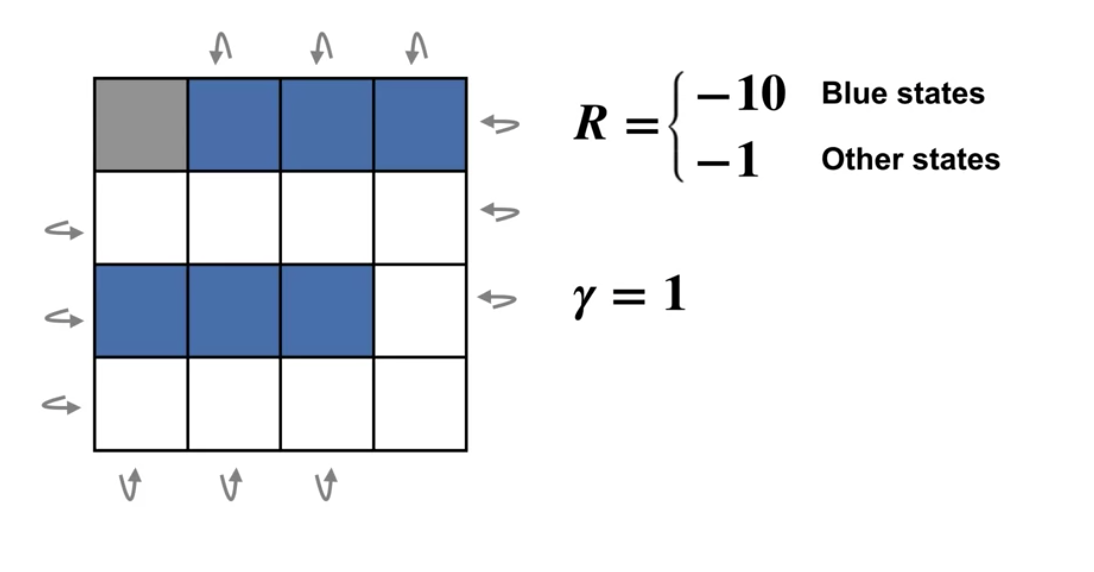

In [2]:
Image("Gridworld II.png")

### Setting the game up

In [3]:
class Actions(Enum):
    UP = 0
    RIGHT = 1
    DOWN = 2
    LEFT = 3


def gridworld_action(state: tuple, action: Actions):
    i, j = state

    if action.name == 'UP':
        i -= 1
    elif action.name == 'RIGHT':
        j += 1
    elif action.name == 'DOWN':
        i += 1
    else:
        j -= 1

    i = np.clip(i, 0, 3)
    j = np.clip(j, 0, 3)
    new_state = (i, j)

    reward = -1
    if i == 0:
        if j > 0:
            reward = -10
    elif i == 2:
        if j < 3:
            reward = -10
    else:
        pass

    return reward, new_state


def get_action_values_for_state(state_values, state):
    action_values = []
    gamma = 1  # episodic task, no discounting

    for a in Actions:
        r, next_state = gridworld_action(state, a)
        next_state_value = state_values[next_state]
        action_value = r + gamma * next_state_value
        action_values.append(action_value)

    return np.array(action_values)  # up, right, left, down


### Policy evaluation
Iterative policy evaluation allows us to estimate the state-value functions for a policy pi, $\upsilon_{\pi }(s)$, of a finite MDP: where $s \in S$

In [4]:
def evaluate_policy(v, pi):
    v_prime = np.zeros(v.shape)
    delta_max = 0
    theta = 0.001

    for i in range(4):

        for j in range(4):

            state = (i, j)
            pi_state = pi[state]

            if sum(state) == 0:  # terminal state
                continue

            else:
                action_values = get_action_values_for_state(v, state)
                new_state_value = sum(pi_state * action_values)

                change = abs(new_state_value - v[state])
                delta_max = change if change > delta_max else delta_max

                v_prime[state] = new_state_value

    if delta_max <= theta:
        return v_prime

    else:
        return evaluate_policy(v_prime, pi)


### Policy Improvement
Iteratively updates the actions based on the state values 

In [5]:
def improve_policy(v, pi):
    new_policy = {}

    for state in pi.keys():

        if state == (0, 0):
            new_policy[state] = np.nan
            continue

        action_values = get_action_values_for_state(v, state)
        greedy_action = np.argmax(action_values)

        action_probas = [0., 0., 0., 0.]
        action_probas[greedy_action] = 1.  # must be greedy

        new_policy[state] = np.array(action_probas)

    return new_policy


### Policy Iteration

In [6]:
# Instantiate states and policy
init_state_values = np.zeros((4, 4))

uniform_random = np.array([0.25, 0.25, 0.25, 0.25])
policy = {}
for i in range(4):
    for j in range(4):
        state = (i, j)
        if state == (0, 0):  # terminal state
            policy[state] = np.nan
        else:
            policy[state] = uniform_random

# Iterate to improve
optimal = False
prev_state_values = evaluate_policy(init_state_values, policy)

while not optimal:
    policy = improve_policy(prev_state_values, policy)
    new_state_values = evaluate_policy(prev_state_values, policy)

    optimal = np.all(new_state_values == prev_state_values)
    if not optimal:
        prev_state_values = new_state_values


In [7]:
# Display policy
print(f'Optimal policy: {optimal}')
for state, pi_state in policy.items():
    if state == (0, 0):
        continue
    else:
        idx = np.argmax(pi_state)
        policy[state] = Actions(idx).name
        
policy

Optimal policy: True


{(0, 0): nan,
 (0, 1): 'LEFT',
 (0, 2): 'DOWN',
 (0, 3): 'DOWN',
 (1, 0): 'UP',
 (1, 1): 'LEFT',
 (1, 2): 'LEFT',
 (1, 3): 'LEFT',
 (2, 0): 'UP',
 (2, 1): 'UP',
 (2, 2): 'UP',
 (2, 3): 'UP',
 (3, 0): 'RIGHT',
 (3, 1): 'RIGHT',
 (3, 2): 'RIGHT',
 (3, 3): 'UP'}

Graphically represented as:


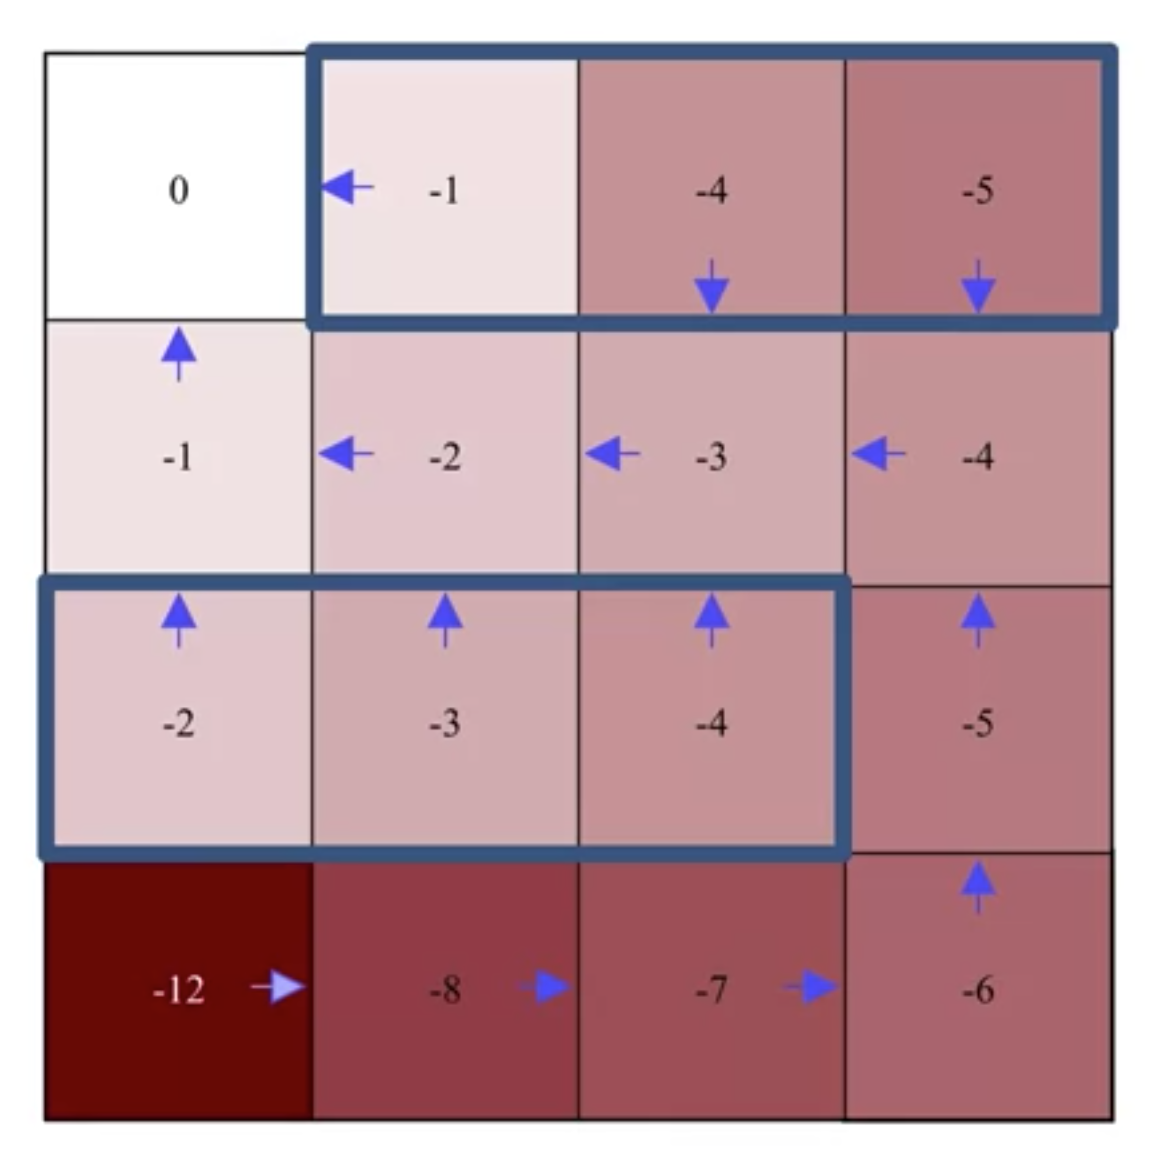

In [8]:
print('Graphically represented as:')
Image("Greedy Policy Iteration Solution.png")